In [19]:
!pip install tensorflow --ignore-installed


  Using cached tensorflow-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aksha\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached h5py-3.6.0-cp39-cp39-win_amd64.whl (2.8 MB)
  Using cached setuptools-62.3.2-py3-none-any.whl (1.2 MB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached wrapt-1.14.1-cp39-

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from sklearn.impute import SimpleImputer

In [2]:
import os
import pandas as pd
from sklearn.impute import SimpleImputer

path ="./trafficsigns_dataset/"
lst = []
for root, dirs, files in os.walk(path):
    for file in files:
        if(file.endswith(".png")):
            print(root)
            root1=root.split("/")[-1].split("\\")
            lst.append([root1[0], root1[1], file])
dfdata = pd.DataFrame(lst, columns=['shape', 'sign', 'imageName'])

./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rightofway
./trafficsigns_dataset/diamond\rig

./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout
./trafficsigns_dataset/round\roundabout


./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning
./trafficsigns_dataset/triangle\warning


In [3]:
root.split("/")
root1=root.split("/")[-1].split("\\")

['.', 'trafficsigns_dataset', 'triangle\\warning']

In [4]:
dfdata

,shape,sign,imageName
0,diamond,rightofway,00032_00000.png
1,diamond,rightofway,00032_00001.png
2,diamond,rightofway,00032_00002.png
3,diamond,rightofway,00037_00000.png
4,diamond,rightofway,00037_00001.png
...,...,...,...
3694,triangle,warning,01947_00001.png
3695,triangle,warning,01947_00002.png
3696,triangle,warning,01971_00000.png
3697,triangle,warning,01971_00001.png


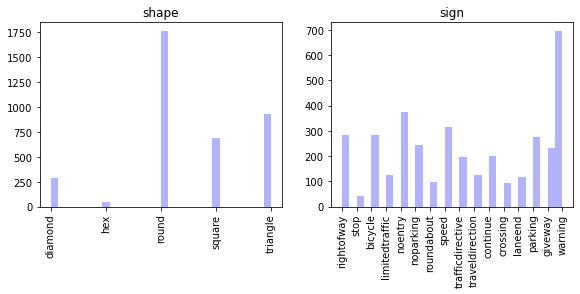

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,40))
for i, col in enumerate(['shape', 'sign']):
    plt.subplot(10,4,i+1)
    plt.hist(dfdata[col], alpha=0.3, color='b',bins=30)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [16]:
dfdata['shape'].value_counts()


round       1760
triangle     926
square       688
diamond      282
hex           43
Name: shape, dtype: int64

In [18]:
dfdata['sign'].value_counts()

warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: sign, dtype: int64